# Yelp Data Challenge - Data Preprocessing 1


##### Patrick(Pengyuan) Li 🌰


## Read data from Jason file and load to Pandas DataFrame

##### Our personal machins' memory are not enough to handle all the 9 GB data, so I built a computation machine in Google Cloud.

In [1]:
import json
import pandas as pd


In [2]:
file_business, file_checkin, file_review, file_tip, file_user,file_photo = [
    'Dataset/business.json',
    'Dataset/checkin.json',
    'Dataset/review.json',
    'Dataset/tip.json',
    'Dataset/user.json',
    'Dataset/photo.json'
]

#### Business Data

In [3]:
with open(file_business) as f:
    df_business = pd.DataFrame(json.loads(line) for line in f)

In [4]:
# print(df_business.head())
df_business.head(2)

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,1314 44 Avenue NE,"{'BikeParking': 'False', 'BusinessAcceptsCredi...",Apn5Q_b6Nz61Tq4XzPdf9A,"Tours, Breweries, Pizza, Restaurants, Food, Ho...",Calgary,"{'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0'...",1,51.091813,-114.031675,Minhas Micro Brewery,,T2E 6L6,24,4.0,AB
1,,"{'Alcohol': 'none', 'BikeParking': 'False', 'B...",AjEbIBw6ZFfln7ePHha9PA,"Chicken Wings, Burgers, Caterers, Street Vendo...",Henderson,"{'Friday': '17:0-23:0', 'Saturday': '17:0-23:0...",0,35.960734,-114.939821,CK'S BBQ & Catering,,89002,3,4.5,NV


In [5]:
df_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188593 entries, 0 to 188592
Data columns (total 15 columns):
address         188593 non-null object
attributes      162807 non-null object
business_id     188593 non-null object
categories      188052 non-null object
city            188593 non-null object
hours           143791 non-null object
is_open         188593 non-null int64
latitude        188587 non-null float64
longitude       188587 non-null float64
name            188593 non-null object
neighborhood    188593 non-null object
postal_code     188593 non-null object
review_count    188593 non-null int64
stars           188593 non-null float64
state           188593 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 21.6+ MB


In [6]:
df_business.describe()

,is_open,latitude,longitude,review_count,stars
count,188593.000000,188587.000000,188587.000000,188593.000000,188593.000000
mean,0.830391,38.506793,-97.490873,31.797310,3.631550
std,0.375290,5.122684,17.693360,104.124212,1.016783
min,0.000000,-71.753941,-180.000000,3.000000,1.000000
25%,1.000000,33.630878,-112.279276,4.000000,3.000000
50%,1.000000,36.143595,-111.777460,9.000000,3.500000
75%,1.000000,43.593106,-79.982958,24.000000,4.500000
max,1.000000,85.051129,115.086769,7968.000000,5.000000


In [7]:
df_business.to_csv('Dataset/business.csv')

#### Checkin Data

In [8]:
with open(file_checkin) as f:
    df_checkin = pd.DataFrame(json.loads(line) for line in f)

In [9]:
print(df_checkin.head())

              business_id                                               time
0  7KPBkxAOEtb3QeIL9PEErg  {'Fri-0': 2, 'Sat-0': 1, 'Sun-0': 1, 'Wed-0': ...
1  kREVIrSBbtqBhIYkTccQUg  {'Mon-13': 1, 'Thu-13': 1, 'Sat-16': 1, 'Wed-1...
2  tJRDll5yqpZwehenzE2cSg  {'Thu-0': 1, 'Mon-1': 1, 'Mon-12': 1, 'Sat-16'...
3  tZccfdl6JNw-j5BKnCTIQQ            {'Sun-14': 1, 'Fri-18': 1, 'Mon-20': 1}
4  r1p7RAMzCV_6NPF0dNoR3g  {'Sat-3': 1, 'Sun-18': 1, 'Sat-21': 1, 'Sat-23...


In [10]:
df_checkin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157075 entries, 0 to 157074
Data columns (total 2 columns):
business_id    157075 non-null object
time           157075 non-null object
dtypes: object(2)
memory usage: 2.4+ MB


In [11]:
df_checkin.to_csv('Dataset/checkin.csv')

#### Review Data

In [12]:
with open(file_review) as f:
    df_review = pd.DataFrame(json.loads(line) for line in f)


In [13]:
df_review.head(5)
# df_review.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,iCQpiavjjPzJ5_3gPD5Ebg,0,2011-02-25,0,x7mDIiDB3jEiPGPHOmDzyw,2,The pizza was okay. Not the best I've had. I p...,0,msQe1u7Z_XuqjGoqhB0J5g
1,pomGBqfbxcqPv14c3XH-ZQ,0,2012-11-13,0,dDl8zu1vWPdKGihJrwQbpw,5,I love this place! My fiance And I go here atl...,0,msQe1u7Z_XuqjGoqhB0J5g
2,jtQARsP6P-LbkyjbO1qNGg,1,2014-10-23,1,LZp4UX5zK3e-c5ZGSeo3kA,1,Terrible. Dry corn bread. Rib tips were all fa...,3,msQe1u7Z_XuqjGoqhB0J5g
3,elqbBhBfElMNSrjFqW3now,0,2011-02-25,0,Er4NBWCmCD4nM8_p1GRdow,2,Back in 2005-2007 this place was my FAVORITE t...,2,msQe1u7Z_XuqjGoqhB0J5g
4,Ums3gaP2qM3W1XcA5r6SsQ,0,2014-09-05,0,jsDu6QEJHbwP2Blom1PLCA,5,Delicious healthy food. The steak is amazing. ...,0,msQe1u7Z_XuqjGoqhB0J5g


In [14]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5996996 entries, 0 to 5996995
Data columns (total 9 columns):
business_id    object
cool           int64
date           object
funny          int64
review_id      object
stars          int64
text           object
useful         int64
user_id        object
dtypes: int64(4), object(5)
memory usage: 411.8+ MB


In [15]:
df_review.describe()

,cool,funny,stars,useful
count,5.996996e+06,5.996996e+06,5.996996e+06,5.996996e+06
mean,5.816597e-01,4.911249e-01,3.736306e+00,1.368465e+00
std,2.316354e+00,2.406411e+00,1.447924e+00,3.713469e+00
min,-1.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00
25%,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00
75%,1.000000e+00,0.000000e+00,5.000000e+00,2.000000e+00
max,5.050000e+02,9.910000e+02,5.000000e+00,1.234000e+03


In [16]:
df_review.to_csv('Dataset/review.csv')

#### Tip Data

In [17]:
with open(file_tip) as f:
    df_tip = pd.DataFrame(json.loads(line) for line in f)


In [18]:
print(df_tip.head())

              business_id        date  likes  \
0  tJRDll5yqpZwehenzE2cSg  2012-07-15      0   
1  2ThtBbeDqFkVi6LugUOcVA  2012-11-25      0   
2  jH19V2I9fIslnNhDzPmdkA  2015-08-12      0   
3  dAa0hB2yrnHzVmsCkN4YvQ  2014-06-20      0   
4  dAa0hB2yrnHzVmsCkN4YvQ  2016-10-12      0   

                                                text                 user_id  
0              Get here early enough to have dinner.  zcTZk7OG8ovAmh_fenH21g  
1  Don't use them! Double charged my boyfriend an...  M5n8mMFoeXjnJEV2gxyGGA  
2  Great breakfast large portions and friendly wa...  ZcLKXikTHYOnYt5VYRO5sg  
3  Nice place. Great staff.  A fixture in the tow...  oaYhjqBbh18ZhU0bpyzSuw  
4                     Happy hour 5-7 Monday - Friday  ulQ8Nyj7jCUR8M83SUMoRQ  


In [19]:
df_tip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1185348 entries, 0 to 1185347
Data columns (total 5 columns):
business_id    1185348 non-null object
date           1185348 non-null object
likes          1185348 non-null int64
text           1185348 non-null object
user_id        1185348 non-null object
dtypes: int64(1), object(4)
memory usage: 45.2+ MB


In [20]:
df_tip.describe()

,likes
count,1.185348e+06
mean,1.660609e-02
std,1.463528e-01
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,1.500000e+01


In [21]:
df_tip.to_csv('Dataset/tip.csv')

#### User Data

In [22]:
with open(file_user) as f:
    df_user = pd.DataFrame(json.loads(line) for line in f)


In [23]:
print(df_user.head())

   average_stars  compliment_cool  compliment_cute  compliment_funny  \
0           2.00                0                0                 0   
1           5.00                0                0                 0   
2           4.00                0                0                 0   
3           4.05                0                0                 0   
4           3.00                0                0                 0   

   compliment_hot  compliment_list  compliment_more  compliment_note  \
0               0                0                0                0   
1               0                0                0                0   
2               0                0                0                0   
3               0                0                0                0   
4               0                0                0                0   

   compliment_photos  compliment_plain      ...        cool  elite  fans  \
0                  0                 0      ...           

In [24]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1518169 entries, 0 to 1518168
Data columns (total 22 columns):
average_stars         1518169 non-null float64
compliment_cool       1518169 non-null int64
compliment_cute       1518169 non-null int64
compliment_funny      1518169 non-null int64
compliment_hot        1518169 non-null int64
compliment_list       1518169 non-null int64
compliment_more       1518169 non-null int64
compliment_note       1518169 non-null int64
compliment_photos     1518169 non-null int64
compliment_plain      1518169 non-null int64
compliment_profile    1518169 non-null int64
compliment_writer     1518169 non-null int64
cool                  1518169 non-null int64
elite                 1518169 non-null object
fans                  1518169 non-null int64
friends               1518169 non-null object
funny                 1518169 non-null int64
name                  1518169 non-null object
review_count          1518169 non-null int64
useful                15181

In [25]:
df_user.describe()

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,compliment_profile,compliment_writer,cool,fans,funny,review_count,useful
count,1.518169e+06,1.518169e+06,1.518169e+06,1.518169e+06,1.518169e+06,1.518169e+06,1.518169e+06,1.518169e+06,1.518169e+06,1.518169e+06,1.518169e+06,1.518169e+06,1.518169e+06,1.518169e+06,1.518169e+06,1.518169e+06,1.518169e+06
mean,3.716941e+00,3.257744e+00,2.030696e-01,3.257744e+00,2.351439e+00,8.959674e-02,3.496482e-01,1.550980e+00,1.161873e+00,3.239886e+00,2.257515e-01,1.225092e+00,1.912421e+01,1.453618e+00,1.399221e+01,2.243219e+01,2.866694e+01
std,1.133998e+00,8.910309e+01,1.315116e+01,8.910309e+01,7.944780e+01,1.129681e+01,1.411544e+01,5.734051e+01,9.679741e+01,9.271578e+01,1.676400e+01,3.325393e+01,6.978946e+02,1.519258e+01,5.225402e+02,7.750849e+01,7.301740e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.070000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00
50%,3.920000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00
75%,4.670000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e+01,3.000000e+00
max,5.000000e+00,3.069900e+04,1.364800e+04,3.069900e+04,3.353400e+04,1.266300e+04,1.349400e+04,5.747500e+04,8.259300e+04,4.862800e+04,1.416500e+04,1.543300e+04,2.559090e+05,8.665000e+03,2.421200e+05,1.272300e+04,2.584790e+05


In [26]:
df_user.to_csv('Dataset/user.csv')

#### Photo data

In [27]:
with open(file_photo) as f:
    df_photo = pd.DataFrame(json.loads(line) for line in f)

In [28]:
df_photo.head()

,business_id,caption,label,photo_id
0,wRKYaVXTks43GVSI2awTQA,,food,IuXwafFH3fZlTyXA-poz0w
1,wRKYaVXTks43GVSI2awTQA,,food,vhnZ58_1shy9HNVdZgtMLw
2,wRKYaVXTks43GVSI2awTQA,,food,j9ad7H2IBEzhfNCuJu4ukg
3,wRKYaVXTks43GVSI2awTQA,,food,du-5X44HccQ9Zo3pQPiFgQ
4,wRKYaVXTks43GVSI2awTQA,The classic Farmer's Choice Breakfast has a li...,food,u7Tt1nvclYNoq3UOToP-GA


In [29]:
df_photo.to_csv('Dataset/photo.csv')

# Filter data by city and category

#### Create filters/masks 1

* create filters that selects business 
    * that are located in "Las Vegas"
    * that contains "Restaurants" in their category (You may need to filter null categories first)

In [50]:
lasvegasbusiness = df_business.query('city =="Las Vegas" ')

In [51]:
lasvegasrest = lasvegasbusiness[lasvegasbusiness['categories'].apply(str).str.contains("Restaurants")]

In [68]:
lasvegasrest = lasvegasrest[lasvegasrest.categories.isnull() == False]
# lasvegasrest.to_csv('Dataset/lasvegasrest.csv')

#### Create filters/masks 2

* create filters that selects business 
    * that are located in "Pittsburgh"
    * that contains "Restaurants" in their category (You may need to filter null categories first)

In [91]:
pittsbusiness = df_business.query('city =="Pittsburgh" ')
pittsrest = pittsbusiness[pittsbusiness['categories'].apply(str).str.contains("Restaurants")]
pittsrest = pittsrest[pittsrest.categories.isnull() == False]
# pittsrest.to_csv('Dataset/pittsrest.csv')

#### Keep relevant columns

* only keep some useful columns
    * business_id
    * name
    * categories
    * stars

In [95]:
keepcol = ['business_id','name','categories','stars']
lasvegasrest = lasvegasrest[keepcol]
pittsrest = pittsrest[keepcol]

In [75]:
lasvegasrest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6148 entries, 19 to 188567
Data columns (total 4 columns):
business_id    6148 non-null object
name           6148 non-null object
categories     6148 non-null object
stars          6148 non-null float64
dtypes: float64(1), object(3)
memory usage: 240.2+ KB


In [96]:
pittsrest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2305 entries, 73 to 188523
Data columns (total 4 columns):
business_id    2305 non-null object
name           2305 non-null object
categories     2305 non-null object
stars          2305 non-null float64
dtypes: float64(1), object(3)
memory usage: 90.0+ KB


In [97]:
# Rename the column name "stars" to "avg_stars" to avoid naming conflicts with review dataset
lasvegasrest = lasvegasrest.rename( columns={"stars": "avg_stars"})
pittsrest = pittsrest.rename(columns = {"stars":"avg_stars"})

In [98]:
lasvegasrest.to_csv('Dataset/lasvegasrest.csv',index=False, encoding="utf-8")
pittsrest.to_csv('Dataset/pittsrest.csv',index=False, encoding="utf-8")

### Use the "business_id" column to filter review data

We want to make a DataFrame that contain and only contain the reviews about the business entities we just obtained.

#### Prepare dataframes to be joined --- on business_id

In [99]:
# Prepare the business dataframe and set index to column "business_id",
# and name it as df_left = df_selected_business.set_index('business_id')
df_left1 = lasvegasrest.set_index('business_id')
df_left2 = pittsrest.set_index('business_id')
# Prepare the review dataframe and set index to column "business_id", and name it as df_right
df_right = df_review.set_index("business_id")

#### Join and reset index

In [100]:
df_lasvegasrestfinal = df_left1.join(df_right,how='inner')
df_pittsrestfinal = df_left2.join(df_right, how = 'inner')
df_lasvegasrestfinal = df_lasvegasrestfinal.reset_index()
df_pittsrestfinal = df_pittsrestfinal.reset_index()

#### We further filter data by date, e.g. keep comments from last 2 years

* Purposefully ignoring the reviews made too long time ago

is it useful to select the user who would like to give review below the ave_stars ????

In [101]:
cond_last_years = df_lasvegasrestfinal['date'] > u'2016-09-01'
df_lasvegasrestfinal = df_lasvegasrestfinal[cond_last_years]
df_lasvegasrestfinal.head(2)

,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id
1,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2017-02-14,0,VETXTwMw6qxzOVDlXfe6Tg,5,went for dinner tonight. Amazing my husband ha...,0,ymlnR8UeFvB4FZL56tCZsA
6,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2017-12-04,0,S8-8uZ7fa5YbjnEtaW15ng,5,This was an amazing dinning experience! ORDER ...,0,9pSSL6X6lFpY3FCRLEH3og


In [102]:
cond_last_years2 = df_pittsrestfinal['date'] > u'2016-09-01'
df_pittsrestfinal = df_pittsrestfinal[cond_last_years2]
df_pittsrestfinal.head(2)

,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id
2,--ujyvoQlwVoBgMYtADiLA,Primanti Bros,"Sandwiches, Sports Bars, Restaurants, Nightlif...",3.5,0,2016-10-05,0,isswD5jO3GwCYIkDNK9AEA,4,I love the white pizza and the Monongahela (bl...,0,D5_iQw0N9wO7kT7FrT7j6A
11,--ujyvoQlwVoBgMYtADiLA,Primanti Bros,"Sandwiches, Sports Bars, Restaurants, Nightlif...",3.5,0,2017-07-31,0,CRMppAp7f0GF5pa8sNkV4g,5,love Primanti bros.great food. good service. f...,0,nyzncOg3goSAMK15IijIqA


In [103]:
import matplotlib.pyplot as plt

% matplotlib inline

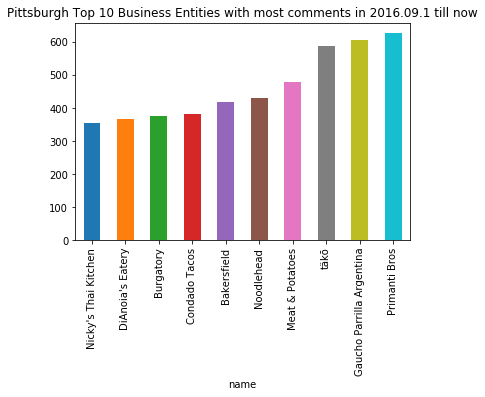

In [105]:
# e.g. calculate counts of reviews per business entity, and plot it
# group by business entity name, count and sort
review_counts_by_business_entity_pitts = df_pittsrestfinal.groupby('name').size().sort_values()

# filter the top 10 business with the most reviews
review_counts_by_business_entity_top_10_names_pitts = review_counts_by_business_entity_pitts[-10:].index

# we try to plot the review received by the top 10 business entities in 22016.09.01 till now
review_counts_top_10_pitts = df_pittsrestfinal[df_pittsrestfinal['name'].isin(review_counts_by_business_entity_top_10_names_pitts)]
review_counts_top_10_pitts = review_counts_top_10_pitts.groupby('name').size().sort_values()
review_counts_top_10_pitts.plot.bar(title='Pittsburgh Top 10 Business Entities with most comments in 2016.09.1 till now')

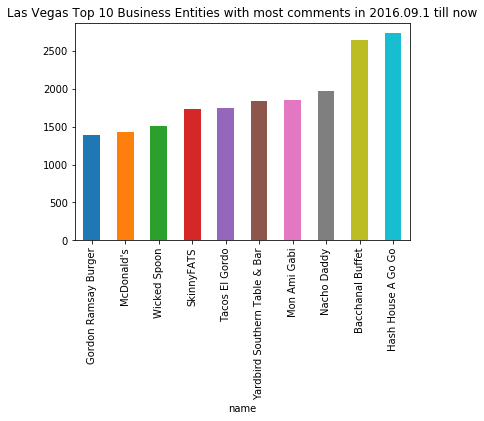

In [106]:
# e.g. calculate counts of reviews per business entity, and plot it
# group by business entity name, count and sort
review_counts_by_business_entity_las = df_lasvegasrestfinal.groupby('name').size().sort_values()

# filter the top 10 business with the most reviews
review_counts_by_business_entity_top_10_names_las = review_counts_by_business_entity_las[-10:].index

# we try to plot the review received by the top 10 business entities in 22016.09.01 till now
review_counts_top_10_las = df_lasvegasrestfinal[df_lasvegasrestfinal['name'].isin(review_counts_by_business_entity_top_10_names_las)]
review_counts_top_10_las = review_counts_top_10_las.groupby('name').size().sort_values()
review_counts_top_10_las.plot.bar(title='Las Vegas Top 10 Business Entities with most comments in 2016.09.1 till now')

In [107]:
df_lasvegasrestfinal.to_csv('Dataset/lasvegasrestfinallast2year.csv')
df_pittsrestfinal.to_csv('Dataset/pittsrestfinallast2year.csv')